In [57]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)


In [58]:
df1 = pd.read_csv('../heart_disease/processed.cleveland.data')
df2 = pd.read_csv('../heart_disease/processed.switzerland.data')
df3 = pd.read_csv('../heart_disease/processed.va.data')
df4 = pd.read_csv('../heart_disease/reprocessed.hungarian.data',sep=' ')

In [59]:
df1.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df2.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df3.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df4.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']


df = pd.concat([df1, df2,df3,df4], axis=0,ignore_index=True)

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
913,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
914,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
915,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [60]:
df = df.apply(pd.to_numeric, errors='coerce').dropna()

7. Attribute Information:
   -- Only 14 used
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)


In [61]:

categorical_features = df.nunique().to_dict()

categorical_features


{'age': 47,
 'sex': 2,
 'cp': 4,
 'trestbps': 55,
 'chol': 202,
 'fbs': 3,
 'restecg': 4,
 'thalach': 104,
 'exang': 3,
 'oldpeak': 41,
 'slope': 4,
 'ca': 6,
 'thal': 4,
 'num': 5}

In [62]:
# Finding number of not null values -> we can see that none of the values are null so we are fine.

df.isna().count()

age         590
sex         590
cp          590
trestbps    590
chol        590
fbs         590
restecg     590
thalach     590
exang       590
oldpeak     590
slope       590
ca          590
thal        590
num         590
dtype: int64

In [63]:
# Finding basic statistical data such as mean median mode etc.

# In report talk about data with high std

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,51.208475,0.700000,3.077966,131.840678,238.667797,-0.016949,0.591525,144.042373,0.301695,0.822034,-1.744068,-4.052542,-1.391525,0.872881
std,9.078357,0.458646,0.964931,18.611433,77.375442,1.097791,0.952664,24.643673,0.603187,1.070196,5.007694,4.909602,7.023675,1.237135
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,44.250000,0.000000,2.000000,120.000000,205.250000,0.000000,0.000000,127.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,52.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,146.000000,0.000000,0.200000,1.000000,0.000000,3.000000,0.000000
75%,58.000000,1.000000,4.000000,140.000000,276.750000,0.000000,2.000000,162.000000,1.000000,1.500000,2.000000,0.000000,6.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,4.000000


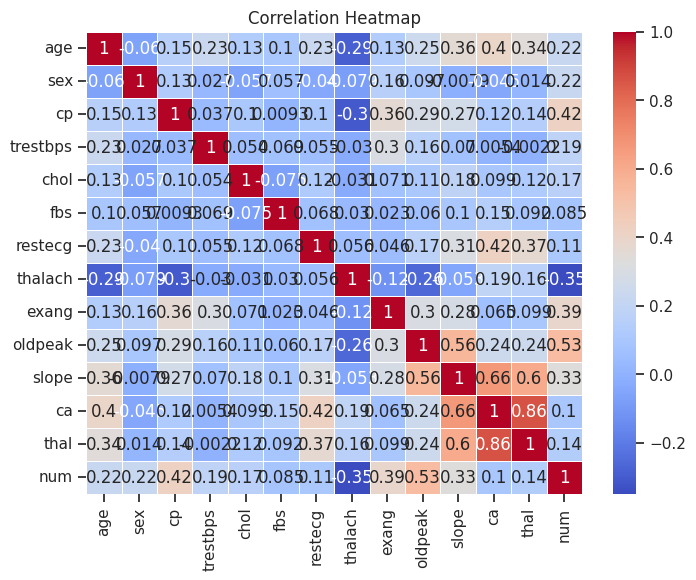

In [64]:
# talk about high correlation etc for this part.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))  # Set the size of the heatmap

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Heatmap")  # Add a title
plt.show()


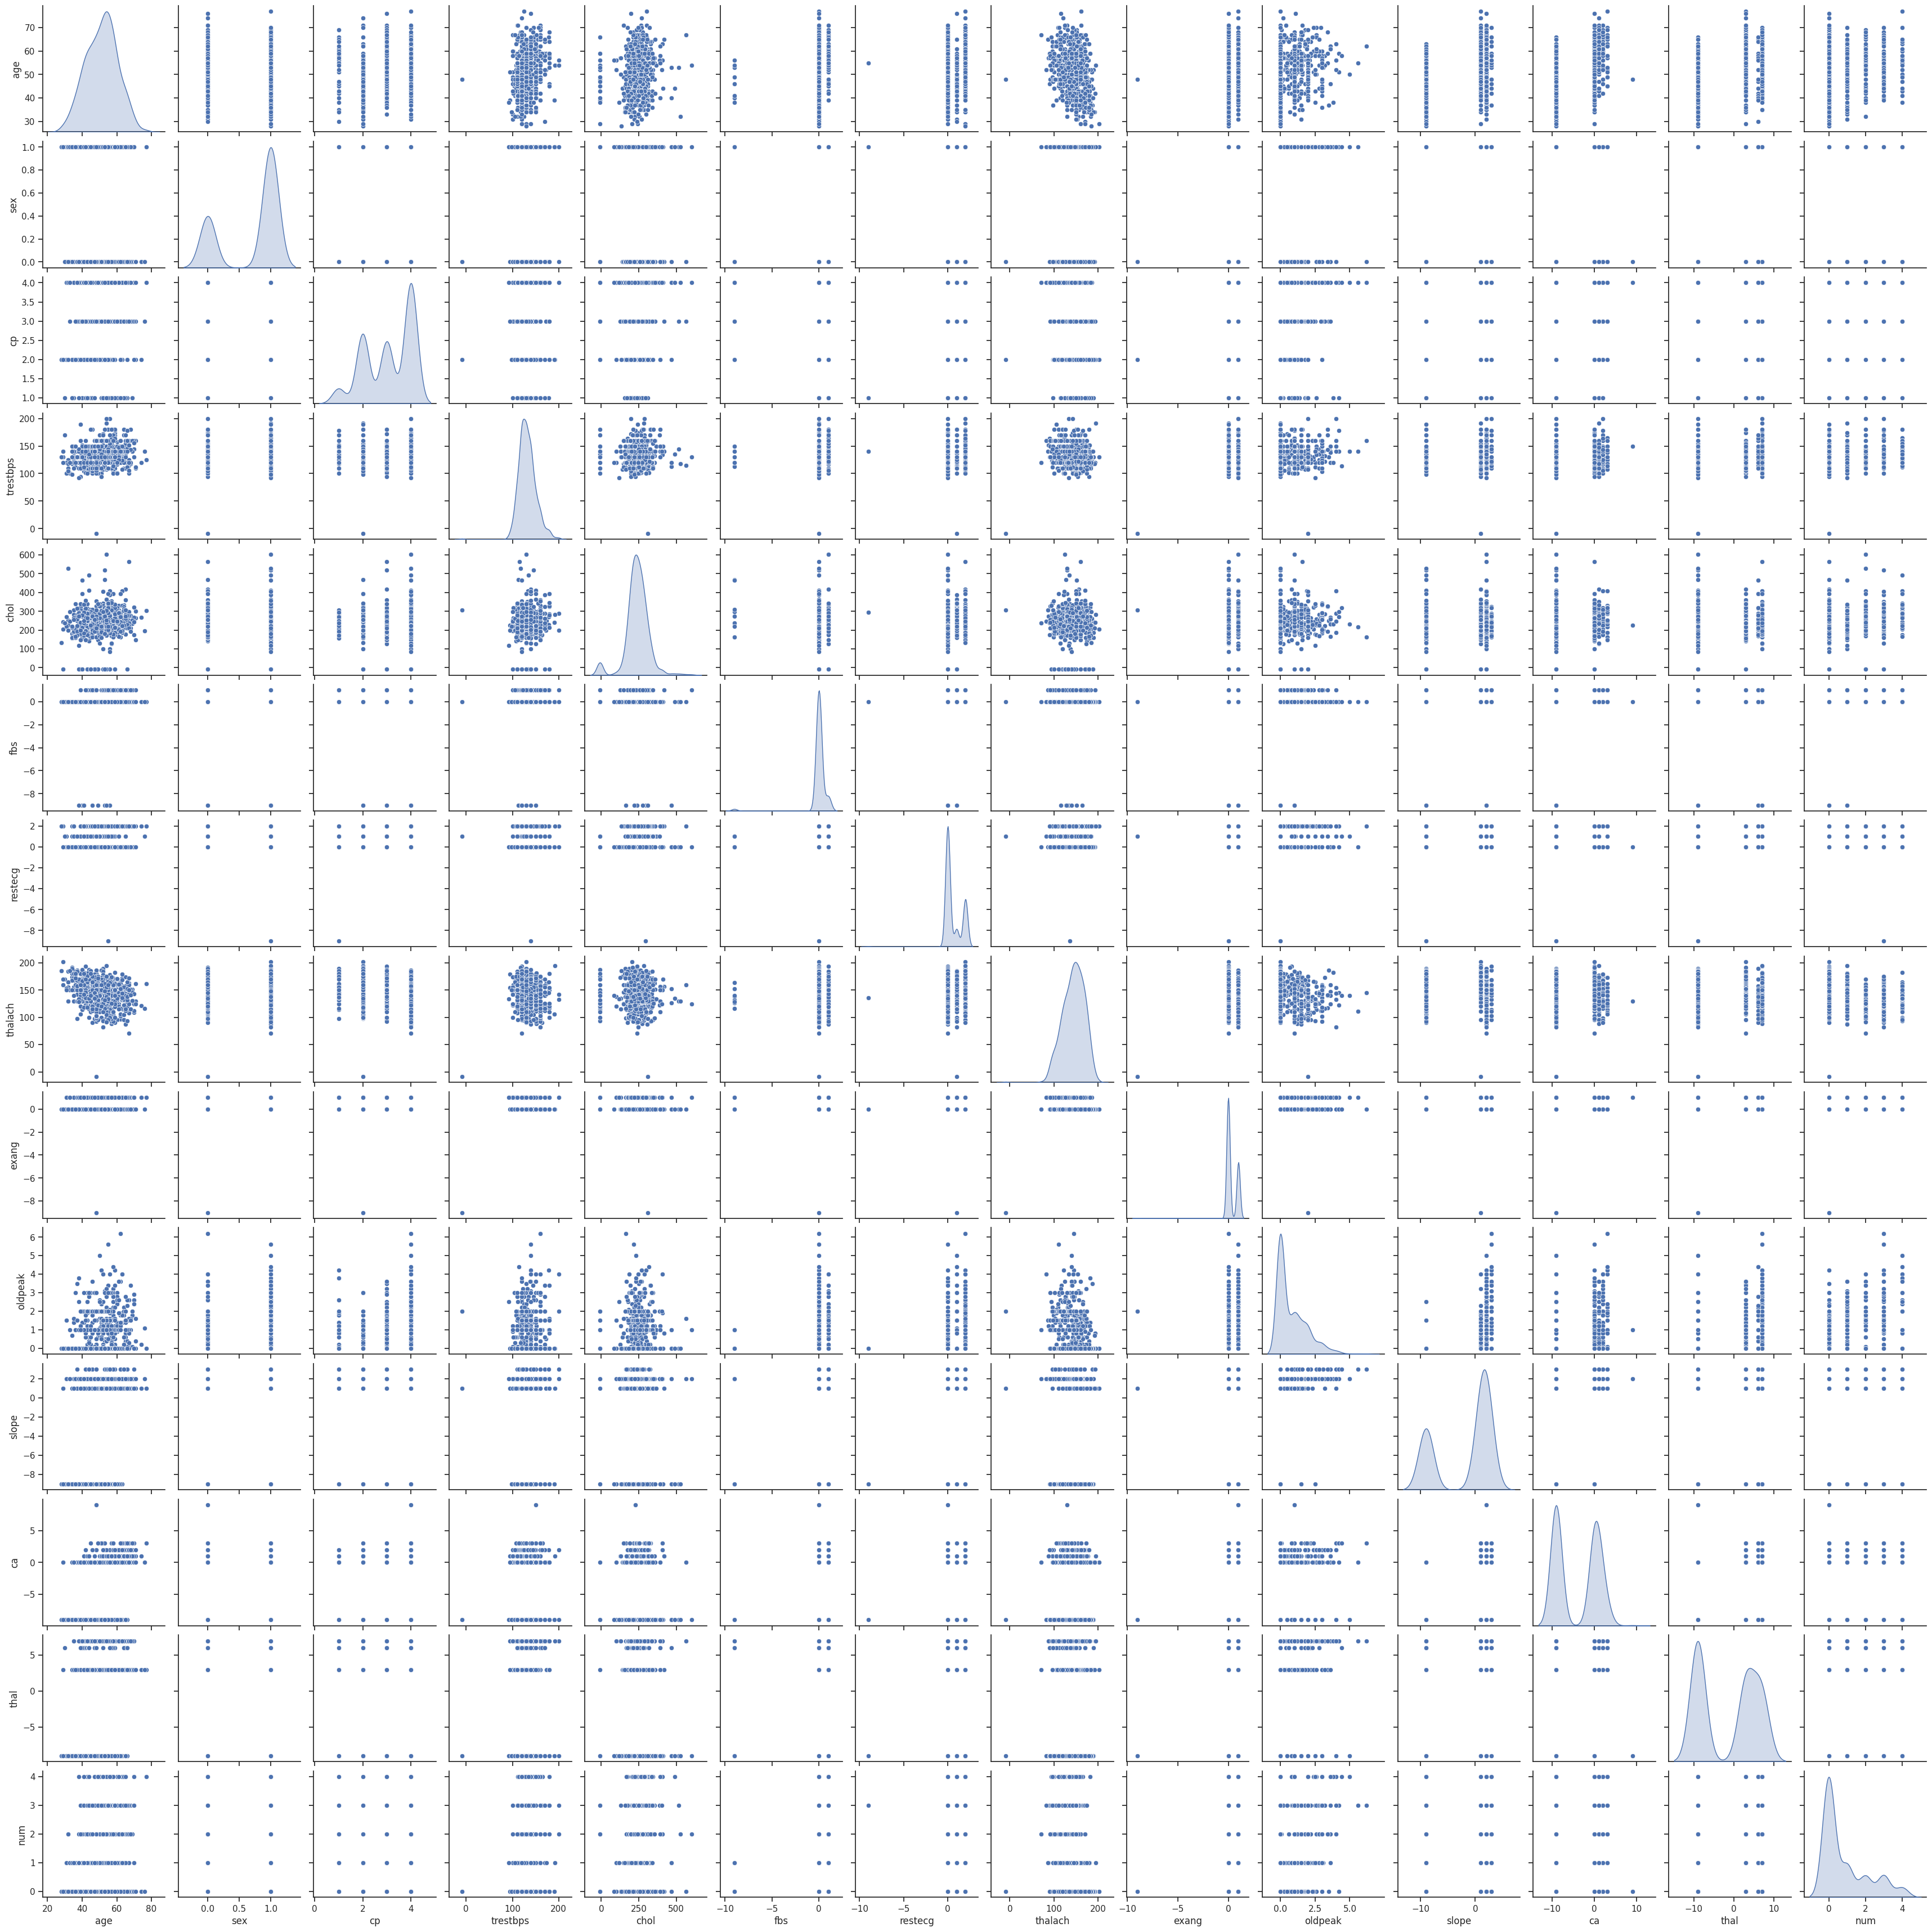

In [65]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind="kde")  # diag_kind can be "hist" or "kde" for diagonal plots

plt.show()

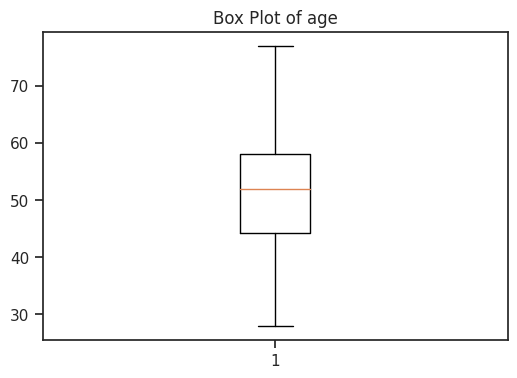

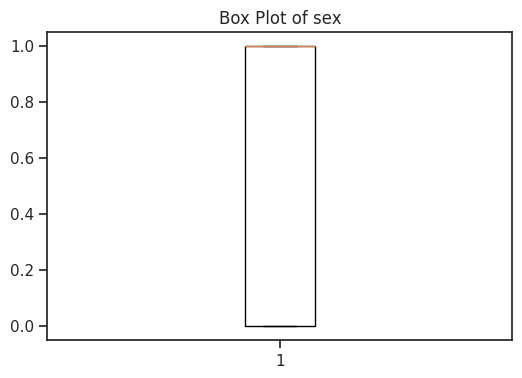

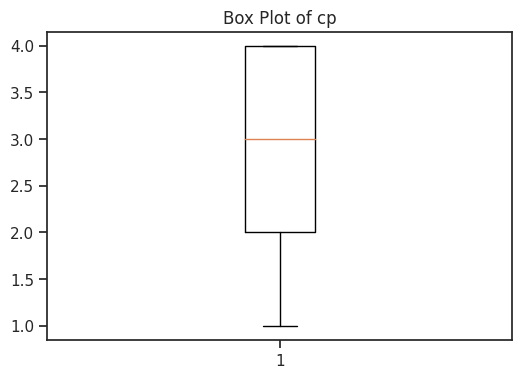

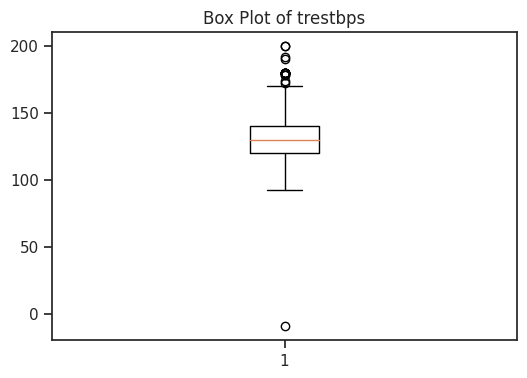

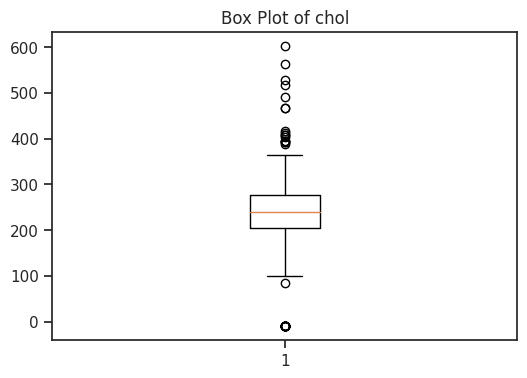

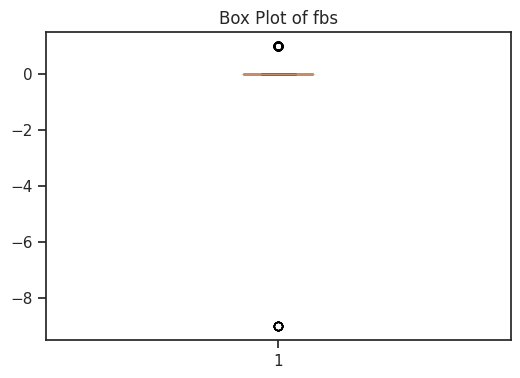

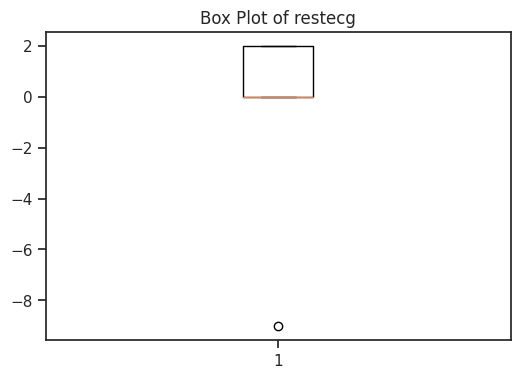

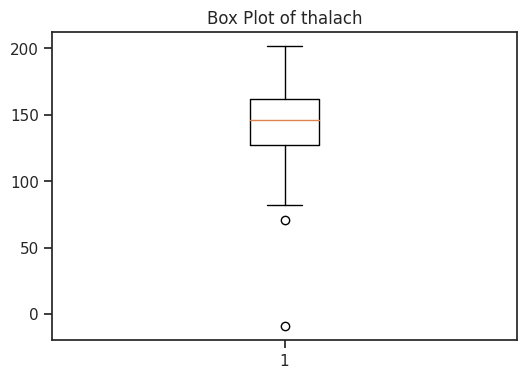

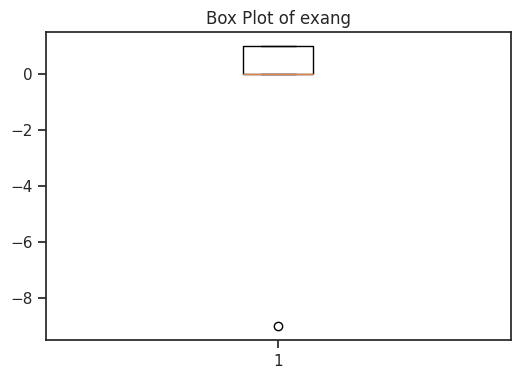

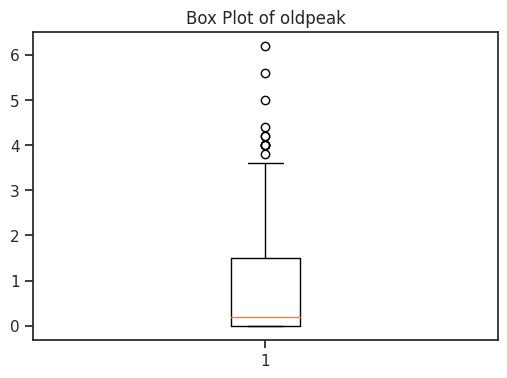

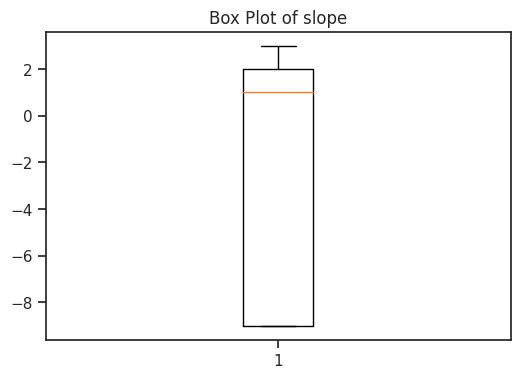

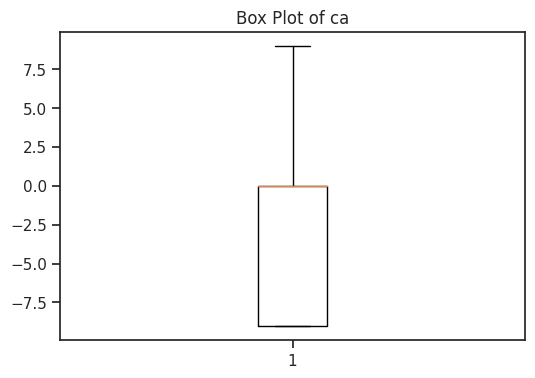

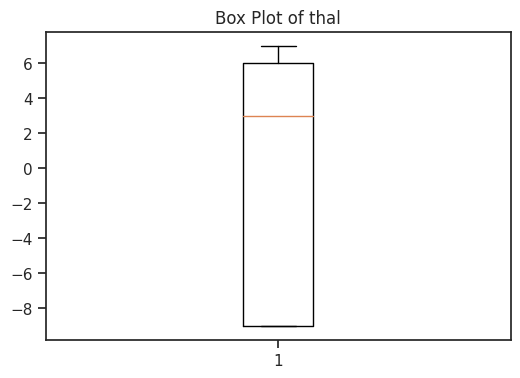

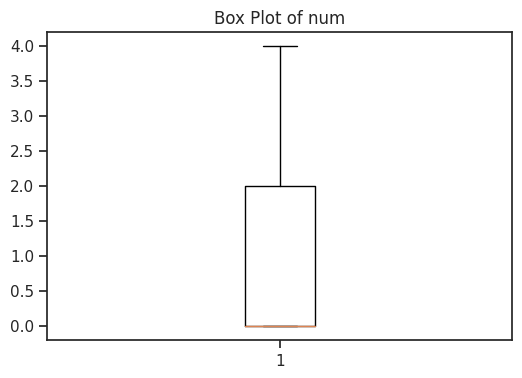

In [66]:
# Can see few outliers here talk about that

for column in df.columns:
    plt.figure(figsize=(6, 4))  
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

<Figure size 600x400 with 0 Axes>

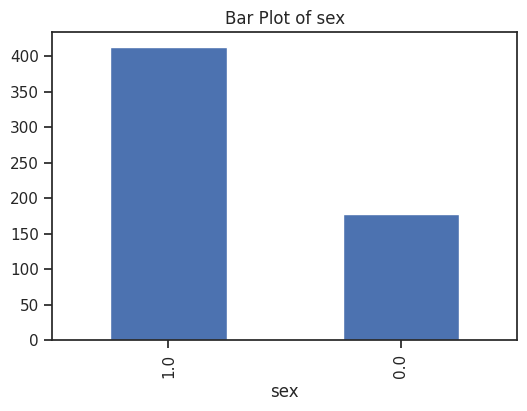

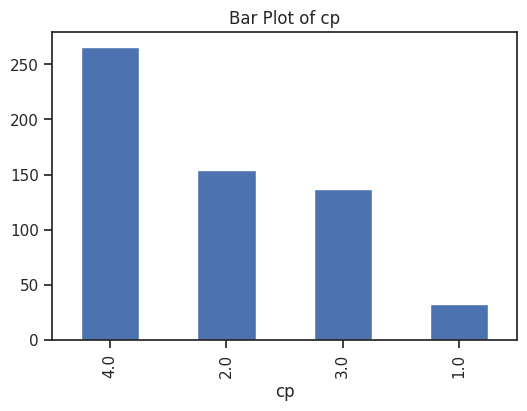

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

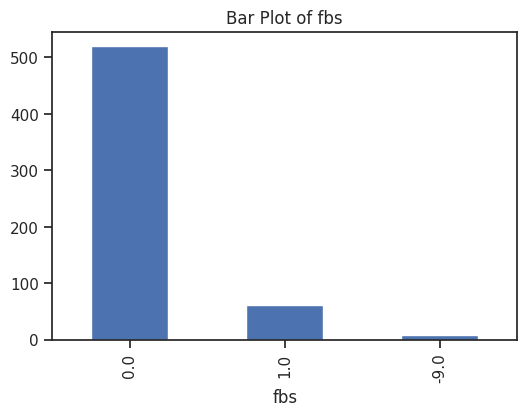

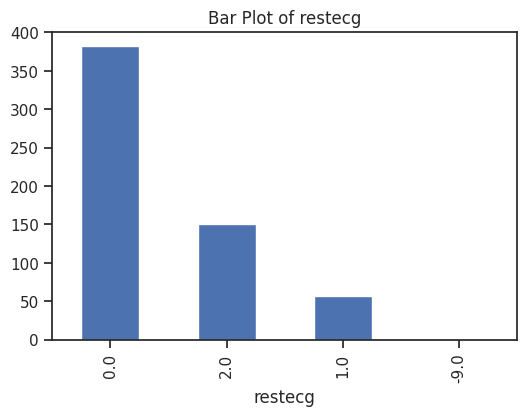

<Figure size 600x400 with 0 Axes>

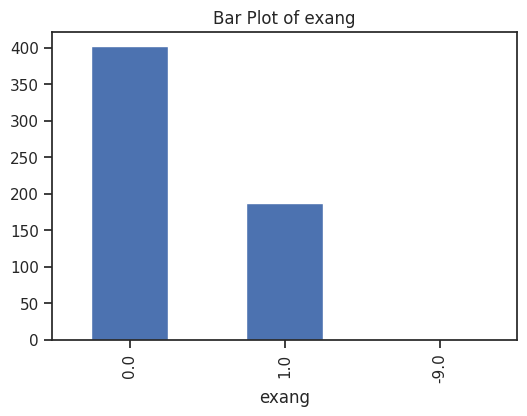

<Figure size 600x400 with 0 Axes>

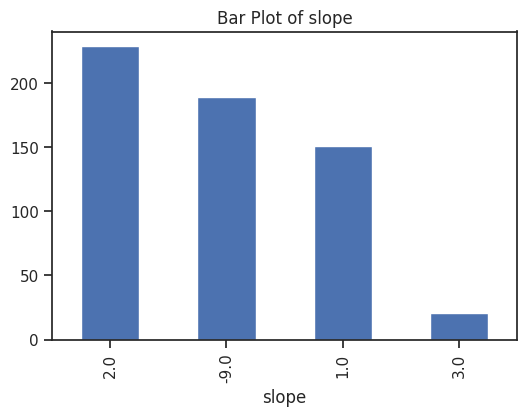

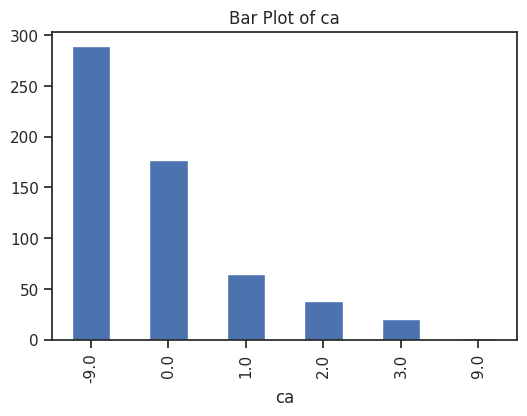

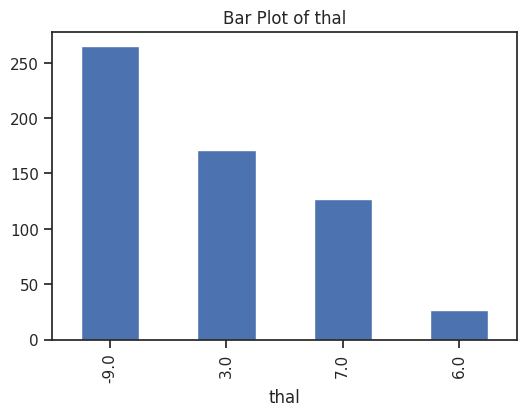

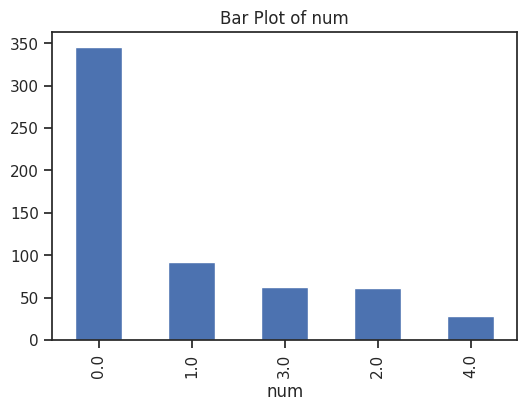

In [67]:

for col in categorical_features:
    plt.figure(figsize=(6,4))
    if(categorical_features[col] <= 10):
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {col}')
        plt.show()        

### Describe 5 features from above EDA


### Splitting data into train and test set

In [83]:
data = df.to_numpy()

data.shape

(590, 14)

In [93]:
# Dividing data into test set and train set

X = data[:,0:-1]
y = data[:,-1]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")



X_train shape : (472, 13)
y_train shape : (472,)
X_test shape : (118, 13)
y_test shape : (118,)


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

entropy_tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
gini_tree = DecisionTreeClassifier(criterion='gini',random_state=42)


# Training and testing
entropy_tree.fit(X_train, y_train)
gini_tree.fit(X_train, y_train)

y_pred_entropy = entropy_tree.predict(X_test)
y_pred_gini = gini_tree.predict(X_test)

# Evaluating accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test,y_pred_gini)

print(f"Accuracy with entropy {accuracy_entropy}")
print(f"Accuracy with gini {accuracy_gini}")

print("---------------------------------------")

if accuracy_entropy > accuracy_gini:
    print("The best criterion is entropy.")
else:
    print("The best criterion is gini.")



Accuracy with entropy 0.5677966101694916
Accuracy with gini 0.5508474576271186
---------------------------------------
The best criterion is entropy.


### Making grid search on best criterion (entropy)

In [108]:
from sklearn.model_selection import GridSearchCV

entropy_tree = DecisionTreeClassifier(criterion='entropy',random_state=42) # defining this again

param_grid = {
    'min_samples_split': [2,5,10,14], 
    'max_features': ['sqrt', 'log2', None]
}
entropy_tree.fit(X_train, y_train)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy with entropy without best parameters {accuracy_entropy}")

print("---------------------------------------")

grid_search = GridSearchCV(entropy_tree, param_grid, cv=3) 

grid_search.fit(X_test, y_test)


best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

print("---------------------------------------")

best_entropy_tree = DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=14, random_state=42)

best_entropy_tree.fit(X_train,y_train)

best_pred = best_entropy_tree.predict(X_test)

best_accuracy_score = accuracy_score(y_test,best_pred)

print(f"Accuracy with entropy with best parameters {best_accuracy_score}")

Accuracy with entropy without best parameters 0.5677966101694916
---------------------------------------
Best Hyperparameters: {'max_features': 'sqrt', 'min_samples_split': 14}
---------------------------------------
Accuracy with entropy with best parameters 0.5932203389830508


In [90]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=10, random_state=42)

### Training Random Forest now

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10]  
}

rf_classifier = RandomForestClassifier(random_state=3)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=2, scoring='accuracy')


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_classifier = RandomForestClassifier(random_state=1, **best_params)
best_rf_classifier.fit(X_train, y_train)


y_pred = best_rf_classifier.predict(X_test)

class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("\nClassification Report on the test data:\n", class_report)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

Classification Report on the test data:
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.89        75
         1.0       0.19      0.25      0.21        12
         2.0       0.40      0.40      0.40        10
         3.0       0.56      0.31      0.40        16
         4.0       0.00      0.00      0.00         5

    accuracy                           0.69       118
   macro avg       0.40      0.38      0.38       118
weighted avg       0.66      0.69      0.67       118



In [112]:
### Need to concatenate more data to this